```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 
```

# Model Selection / Evaluation


In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset,
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Table of Contents

- [How to Train a Final Machine Learning Model](#intro)
- [The Purpose of Train/Test Split](#ttsplit)
- [The Purpose of k-fold Cross Validation](#cross)
- [Why do we use Resampling Methods](#resa)
- [How to Finalize a Model](#final)
- [Validation Curve](#valid)
- [Learning Curve](#learn)

---
<a id='intro'></a>

## How to Train a Final Machine Learning Model

The machine learning model that we use to make predictions on new data is called the `final model`.

There can be confusion in applied machine learning about how to train a final model.

- How do I predict with cross validation?
- Which model do I choose from cross-validation?
- Do I use the model after preparing it on the training dataset?

### What is a Final Model?
A final machine learning model is a model that you use to make predictions on new data. That is, given new examples of input data, you want to use the model to predict the expected output. This may be a classification (assign a label) or a regression (a real value).

The goal of your machine learning project is to arrive at a final model that performs the best, where "best" is defined by:

- **Data**: the historical data that you have available.
- **Time**: the time you have to spend on the project.
- **Procedure**: the data preparation steps, algorithm or algorithms, and the chosen algorithm configurations.

In your project, you gather the data, spend the time you have, and discover the data preparation procedures, algorithm to use, and how to configure it. The final model is the pinnacle of this process, the end you seek in order to start actually making predictions.

---
<a id='ttsplit'></a>

## The Purpose of Train/Test Split
Why do we use train and test sets?

Creating a train and test split of your dataset is one method `to quickly evaluate the performance of an algorithm on your problem`.

The `training dataset` is used to prepare a model, to train it.

We pretend the `test dataset` is new data where the output values are withheld from the algorithm. We gather predictions from the trained model on the inputs from the test dataset and compare them to the withheld output values of the test set.

Comparing the predictions and withheld outputs on the test dataset allows us to compute a performance measure for the model on the test dataset. This is an `estimate of the skill` of the algorithm trained on the problem when making predictions on unseen data.

When we evaluate an algorithm, we are in fact evaluating all steps in the procedure, including how the training data was prepared (e.g. scaling), the choice of algorithm (e.g. kNN), and how the chosen algorithm was configured (e.g. k=3). `The performance measure calculated on the predictions is an estimate of the skill of the whole procedure`.

We generalize the performance measure from: `the skill of the procedure on the test set` to `the skill of the procedure on unseen data`.

Using the `train/test method` of estimating the skill of the procedure on unseen data often has a high variance (unless we have a heck of a lot of data to split). This means that when it is repeated, it gives different results, often very different results. The outcome is that we may be quite uncertain about how well the procedure actually performs on unseen data and how one procedure compares to another. Often, time permitting, we prefer to use `k-fold cross-validation` instead.

---
<a id='cross'></a>

## The Purpose of k-fold Cross Validation
Why do we use `k-fold cross validation`? `Cross-validation` is another method to estimate the skill of a method on unseen data. Like using a train-test split. Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset. This, in turn, provides a population of performance measures.

We can calculate the `mean` of these measures to get an idea of how well the procedure performs on average. We can calculate the `standard deviation` of these measures to get an idea of how much the skill of the procedure is expected to vary in practice. This is also helpful for providing a more nuanced comparison of one procedure to another when you are trying to choose which algorithm and data preparation procedures to use.

Also, this information is invaluable as you can use the mean and spread to give a `confidence interval` on the expected performance on a machine learning procedure in practice. Both `train-test splits` and `k-fold cross validation` are examples of `resampling methods` (see separate notebook for details).

---
<a id='resa'></a>

## Why do we use Resampling Methods?

The problem with applied machine learning is that we are trying to model the unknown. On a given predictive modeling problem, the ideal model is one that performs the best when making predictions on new data. We don’t have new data, so we have to pretend with statistical tricks.

The `train-test split` and `k-fold cross validation` are called resampling methods. `Resampling methods` are statistical procedures for sampling a dataset and estimating an unknown quantity.

In the case of applied machine learning, we are interested in estimating the skill of a machine learning procedure on unseen data. More specifically, the `skill of the predictions` made by a machine learning procedure. Once we have the estimated skill, we are finished with the resampling method.

- If you are using a `train-test split`, that means you can discard the split datasets and the trained model.
- If you are using `k-fold cross-validation`, that means you can throw away all of the trained models.

They have served their purpose and are no longer needed.

You are now ready to finalize your model.

---
<a id='final'></a>

## How to Finalize a Model?
`You finalize a model by applying the chosen machine learning procedure on all of your data`. That’s it.

With the finalized model, you can:

- Save the model for later or operational use.
- Make predictions on new data.

### Questions

1. **What about the cross-validation models or the train-test datasets?** They’ve been discarded. They are no longer needed. They have served their purpose to help you choose a procedure to finalize.
2. **Why not keep the model trained on the training dataset?** You can if you like. You may save time and effort by reusing one of the models trained during skill estimation. This can be a big deal if it takes days, weeks, or months to train a model. Your model will likely perform better when trained on all of the available data than just the subset used to estimate the performance of the model. This is why we prefer to train the final model on all available data.
3. **Won’t the performance of the model trained on all of the data be different?** This question drives most of the misunderstanding around model finalization. Put another way: **If you train a model on all of the available data, then how do you know how well the model will perform?** You have already answered this question using the resampling procedure. If well designed, the performance measures you calculate using train-test or k-fold cross validation suitably describe how well the finalized model trained on all available historical data will perform in general. If you used k-fold cross validation, you will have an estimate of how "wrong" (or conversely, how "right") the model will be on average, and the expected spread of that wrongness or rightness. This is why the careful design of your test harness is so absolutely critical in applied machine learning. A more robust test harness will allow you to lean on the estimated performance all the more.
4. **Each time I train the model, I get a different performance score; should I pick the model with the best score?** Machine learning algorithms are stochastic and this behavior of different performance on the same data is to be expected. Resampling methods like repeated train/test or repeated k-fold cross-validation will help to get a handle on how much variance there is in the method. If it is a real concern, you can create multiple final models and take the mean from an ensemble of predictions in order to reduce the variance.

---
<a id='valid'></a>

## Validation Curve
Creating a **validation curve** is one way to determine an appropriate value for a `hyperparameter`. A validation curve is a plot that shows how the model performance responds to changes in the hyperparameter’s value. The chart shows both the training data and the validation data. The validation scores allow us to infer how the model would respond to unseen data. Typically, we would choose a hyperparameter that maximizes the validation score.

In the following example, we will use Yellowbrick to see if changing the value of the `max_depth` hyperparameter changes the model performance of a random forest. You can provide a scoring parameter set to a `scikit-learn` model metric (the default for classification is `accuracy`).

In [7]:
# target = 'class'
df = get_dataset('pima-indians-diabetes')
df.head()
array = df.values
X = array[:,0:8]
y = array[:,8]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


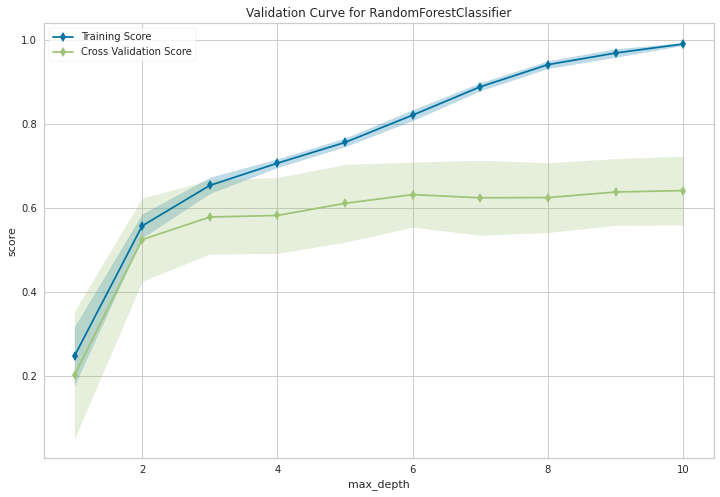

In [14]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.model_selection import (
    ValidationCurve,
)

fig, ax = plt.subplots(figsize=(12, 8))
vc_viz = ValidationCurve(
    RandomForestClassifier(n_estimators=100),
    param_name="max_depth",
    scoring='f1',
    #scoring='accuracy',
    param_range=np.arange(1, 11),
    cv=10,
    n_jobs=-1,
)
vc_viz.fit(X, y)
vc_viz.poof()
#fig.savefig("images/validation_curve.png", dpi=300)

The `ValidationCurve` class supports a `scoring` parameter. The parameter can be a custom function or one of the following options, depending on the task:

- **Regression scoring options:** 'explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', and 'r2'.
- **Classification scoring options include:** 'accuracy', 'average_precision', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'neg_log_loss', 'precision', 'recall', and 'roc_auc'.
- **Clustering scoring options:** 'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'fowlkesmallows_score', 'homogeneity_score', 'mutual_info_score', 'normalized_mutual_info_score', and 'v_measure_score'.

---
<a id='learn'></a>

## Learning Curve
To select the best model for your project, how much data do you need? A **learning curve** can help us answer that question. This curve plots the `training` and `cross-validation` score as we create models with more samples. If the cross-validation score continues to rise, for example, that could indicate that more data would help the model perform better.

The following visualization shows a validation curve and also helps us explore `bias` and `variance` in our model. If there is variability (a large shaded area) in the training score, then the model suffers from bias error and is too simple (`underfit`). If there is variability in the cross-validated score, then the model suffers from variance error and is too complicated (`overfit`). Another indication that the model is `overfit` is that the performance of the validation set is much worse than the training set.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


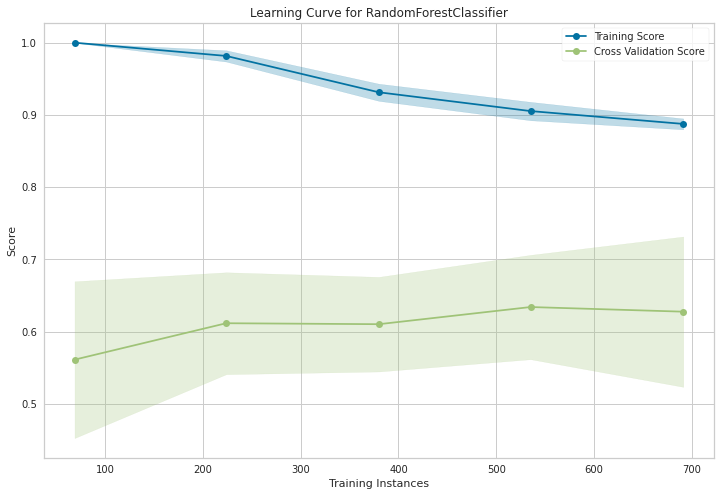

In [30]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.model_selection import (
    LearningCurve,
)

fig, ax = plt.subplots(figsize=(12, 8))
vc_viz = LearningCurve(
    RandomForestClassifier(
        n_estimators=100, 
        #max_depth=2,
        #max_depth=4,
        max_depth=7,
        #max_depth=10,
    ),
    scoring='f1',
    cv=10,
    n_jobs=-1,
)
vc_viz.fit(X, y)
vc_viz.poof()
fig.savefig("images/learning_curve.png", dpi=300)

This visualization can be used for **regression**, **classification** or **clustering** by changing the `scoring` parameter.